## Дипломная работа по курсу "Python для анализа данных"

'''Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Признаки:
    1.satisfaction_level  - Уровень удовлетворенности работой
    2.Last_evaluation  - Время с момента последней оценки в годах
    3.number_projects  - Количество проектов, выполненных за время работы
    4.average_monthly_hours  - Среднее количество часов на рабочем месте в месяц
    5.time_spend_company  - Стаж работы в компании в годах
    6.work_accident  - Происходили ли несчастные случаи на рабочем месте с сотрудником
    7.left  - уволился ли сотрудник
    8.promotion_last_5years  - повышался ли сотрудник за последние пять лет
    9.department  - отдел в котором работает сотрудник
    10.salary  - относительный уровень зарплаты'''

In [5]:
import numpy as np
#np.set_printoptions(precision=4)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
from pandas import ExcelWriter

data_HR = pd.read_csv('HR.csv',#загружаем данные из файла
                       sep=',', encoding='utf-8'
                       )
type(data_HR)#подтвержаем, что это DataFrame

pandas.core.frame.DataFrame

In [6]:
data_HR.head()#выводим несколько строчек данных 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
#Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).
data_HR.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Корелляционная матрица')

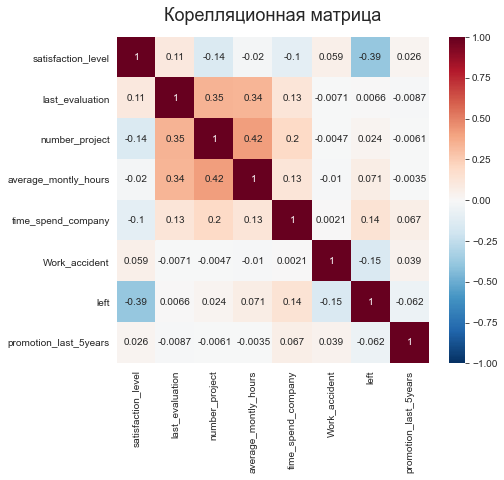

In [8]:
#Рассчитайте и визуализировать корреляционную матрицу для количественных переменных
#sns.palplot(sns.diverging_palette(8, 240, sep=20, n=7))
plt.figure(figsize=(7,6))
corr = data_HR.corr()#расчет корелляционной матрицы
sns_heatmap = sns.heatmap(corr, cmap=sns.color_palette("RdBu_r", 1000), vmin=-1, center=0, annot=True)
sns_heatmap.set_title('Корелляционная матрица', fontdict={'fontsize':18}, pad=16)

In [9]:
#Определите две самые скоррелированные и две наименее скоррелированные переменные
#2 самые скореллированные 1. number_project и last_evalution 2 number_project и average_montly_hours
#2 самые нескореллированные 1. left и last_evaluation 2. work_accident и number_project

In [10]:
#Рассчитайте сколько сотрудников работает в каждом департаменте.
data_HR.groupby(['department'])['satisfaction_level'].count()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: satisfaction_level, dtype: int64

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Распределение по зарплатам')

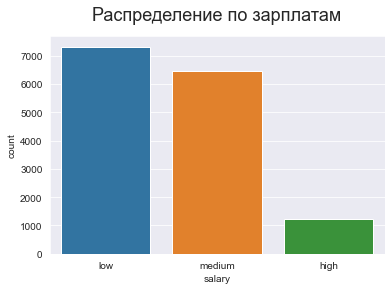

In [11]:
#Показать распределение сотрудников по зарплатам
#строим гистограмму по зарплатам
sns_countplot = sns.countplot(data_HR.salary)
sns_countplot.set_title('Распределение по зарплатам', fontdict={'fontsize':18}, pad=16)

Text(0.5, 1.0, 'Распределение по зарплатам в департаментах')

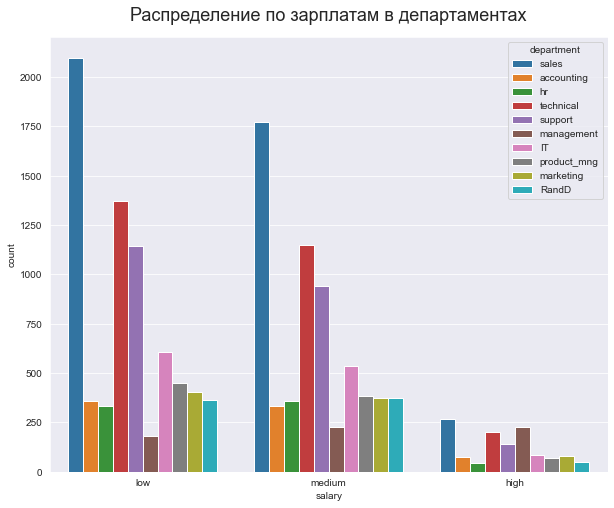

In [12]:
#Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности
plt.figure(figsize=(10,8))
sns_countplot = sns.countplot(x="salary", hue="department", data=data_HR)
sns_countplot.set_title('Распределение по зарплатам в департаментах', fontdict={'fontsize':18}, pad=16)

In [13]:
#Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом
data_HR.salary.unique()#узнаем какие бывают salary

array(['low', 'medium', 'high'], dtype=object)

In [14]:
data_HR['salary_index'] = data_HR.salary#дублируем столбец salary
data_HR['salary_index'].replace({'low': 1,'medium': 2,'high': 3}, inplace=True)#заменяем слова на цифры
data_HR.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,salary_index
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1


In [15]:
#проверим существует ли взаимосвязь между количеством отработанных часов и уровнем зароботной платы
#оценить линейную зависимость можно с помощью Коэффициент корреляции Пирсона.
#если значение корреляции близко к нулю, значит параметры линейно независимые
from scipy.stats import pearsonr
corr, p = pearsonr(data_HR.average_montly_hours, data_HR.salary_index)

In [16]:
#параметры линейно независимые (-0.0022)
corr

-0.002241878734657631

In [17]:
#Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности)
#●Доля сотрудников с повышением за последние 5 лет
#●Средняя степень удовлетворенности
#●Среднее количество проектов

In [18]:
#разбиваем данные по маске left  
mask_left = data_HR['left'] == 1
data_HR_left = data_HR[mask_left]

mask_no_left = data_HR['left'] == 0
data_HR_no_left = data_HR[mask_no_left]

In [19]:
def totalinfo(data):
    print(f'Было повышение: {data.promotion_last_5years.count()}')   
    print('Средний уровень удовлетворенности:{0:6.3f}'.format(data.satisfaction_level.mean()))
    print('Среднее количество проектов:{0:2.0f}'.format(data.number_project.mean()))
    print(f'')
print("Отчет по уволившимся:")    
totalinfo(data_HR_left)
print("Отчет по не уволившимся:")    
totalinfo(data_HR_no_left) 

Отчет по уволившимся:
Было повышение: 3571
Средний уровень удовлетворенности: 0.440
Среднее количество проектов: 4

Отчет по не уволившимся:
Было повышение: 11428
Средний уровень удовлетворенности: 0.667
Среднее количество проектов: 4



In [21]:
#Разделить данные на тестовую и обучающую выборки
#Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department иsalary)
#Оценить качество модели на тестовой выборке

In [22]:
data_ = data_HR.copy()
data_.drop(['left','department','salary'], axis=1, inplace=True)#удаляем ненужные столбцы
data = data_.to_numpy()#преобразуем в массив numpy
data.shape

(14999, 8)

In [23]:
data_class_arr = data_HR.left
data_class = data_class_arr.to_numpy()
data_class

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [24]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

In [25]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [26]:
lda = LinearDiscriminantAnalysis()

In [29]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [28]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
3745,0,0
3746,1,0
3747,1,0
3748,0,0


In [31]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
# (наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_test, lda.predict(X_test))

0.7770666666666667